### Computational explorations in modern number theory: the Green–Tao theorem and the abc conjecture
##### [Hiroyuki Chihara](https://fiomfd.github.io/) (University of the Ryukyus, Okinawa Island, Japan)
##### [ATCM](https://atcm.mathandtech.org/) 2025, 13-16 December 2025, [Ateneo de Manila University](https://www.ateneo.edu/)

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import pprint
import pandas as pd
from numpy.linalg import *
from sympy import primerange
from sympy import isprime
from sympy import gcd
from sympy import factorint
from math import log
from ipywidgets import interact, FloatSlider

### The Prime number theorem

Let us show you primes up to $1000$.

In [2]:
def is_prime(num):
    if num < 2:
        return False
    for i in range(2, int(num**0.5) + 1):
        if num % i == 0:
            return False
    return True

def list_primes_trial_division(limit):
    primes = []
    for num in range(2, limit + 1):
        if is_prime(num):
            primes.append(num)
    return primes

# print primes up to 120
print(list_primes_trial_division(1000))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997]


In his work Elements, Euclid first proved that there exist infinitely many prime numbers in c.300 BC. 

For $x>1$, the number of primes less than or equal to $x$ is denoted by $\pi(x)$. Euclid's theorem implies that $\pi(x) \rightarrow \infty$ ($x \rightarrow \infty$).

The Prime Number Theorem provides the behavior of $\pi(x)$ as $x\rightarrow \infty$ and the information of the distribution of primes:

$\pi(x) \bigg/ \dfrac{x}{\log{x}} 
\rightarrow 1
\quad
(x \rightarrow \infty).$

In 1896, the Prime Number Theorem was proved by Jacques Hadamard and Charles Jean de la Vallée-Poussin independently.

The following graphs visualize 
- The difference $\pi(x) - \dfrac{x}{\log{x}} \rightarrow \infty$ as $x \rightarrow \infty$.

- The convergence of $\pi(x) \bigg/ \dfrac{x}{\log{x}}$ is very slow. 

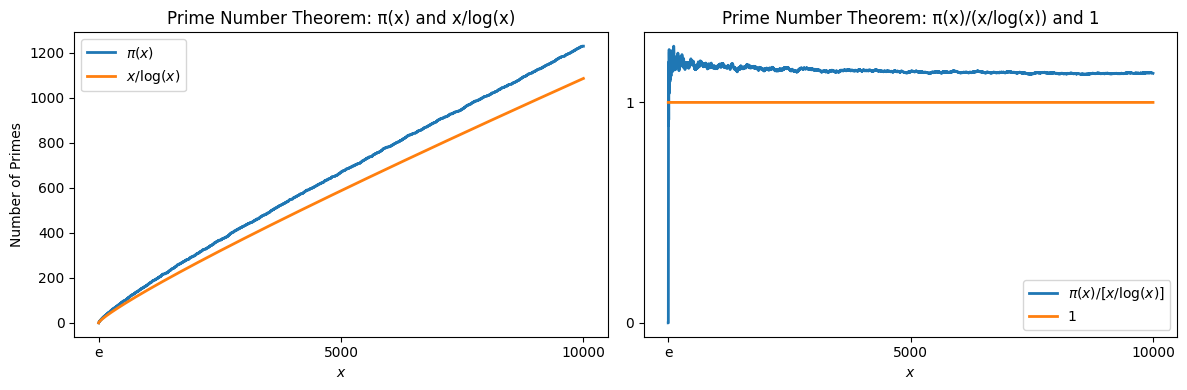

In [2]:
# Initialization
P1 = np.zeros(10000)
L1 = np.zeros(10000)
N1 = np.zeros(10000)
Q1 = np.ones(10000)
R1 = np.zeros(10000)

# Substitute the first two terms (Python starts at 0)
P1[1] = 1
P1[2] = 1
L1[1] = 3 / log(3)
L1[2] = 3 / log(3)
N1[1] = 1
N1[2] = 2

# Main Loop
for i in range(3, 10000):
    A1 = np.array([float(isprime(j)) for j in range(1, i + 1)])
    P1[i] = np.sum(A1)
    L1[i] = i / log(i)
    N1[i] = i
    R1[i] = P1[i] /L1[i]
    
# ====================
# Create a diagram
# ====================

# Two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# --- Figure 1 ---
ax1.plot(N1, P1, label=r"$\pi(x)$", linewidth=2)
ax1.plot(N1, L1, label=r"$x/\log(x)$", linewidth=2)

ax1.set_title("Prime Number Theorem: π(x) and x/log(x)")
ax1.set_xlabel(r"$x$")
ax1.set_ylabel("Number of Primes")
ax1.set_xticks([1, 5000, 10000])
ax1.set_xticklabels(["e", "5000", "10000"])
ax1.legend(loc='upper left', fontsize=10)
ax1.grid(False)

# --- Figure 2 ---
ax2.plot(N1, R1, label=r"$\pi(x)/[x/\log(x)]$", linewidth=2)
ax2.plot(N1, Q1, label="1", linewidth=2)

ax2.set_title("Prime Number Theorem: π(x)/(x/log(x)) and 1")
ax2.set_xlabel(r"$x$")
ax2.set_xticks([1, 5000, 10000])
ax2.set_xticklabels(["e", "5000", "10000"])
ax2.set_yticks([0, 1])
ax2.grid(False)
ax2.legend(loc='lower right', fontsize=10)

# Margin adjustment (simple with tight_layout)
plt.tight_layout()
plt.show()

### The Green-Tao Theorem

In 2004 Ben Green and Terence Tao proved the following historical theorem in number theory: 

#### *The prime numbers contain infinitely many arithmetic progressions of length $k$ for all $k$.*

The original paper is [here](https://doi.org/10.4007/annals.2008.167.481).

We explore such arithmetic progressions $\{x_n\}_{n=1}^k$ using Julia.  
Note that 
- If $x_1=2$, then $k\leqq2$. 
- If $x_1\ne2$, then the common difference of successive members is even. 
- If the final digit of $x_1$ is $5$, then $k\leqq5$ since $5+2c\times5$ is not a prime.
- If the final digit of $x_1$ is $1,3,7,9$ and the final digit of the common difference is $2,4,6,8$, then $k\leqq4$. Indeed

$2\times1=2, \quad 2\times2=4, \quad 2\times3=6, \quad 2\times4=8 \quad\text{mod}\quad 10,$
$4\times1=4, \quad 4\times2=8, \quad 4\times3=2, \quad 4\times4=6 \quad\text{mod}\quad 10,$
$6\times1=6, \quad 6\times2=2, \quad 6\times3=8, \quad 6\times4=4 \quad\text{mod}\quad 10,$
$8\times1=8, \quad 8\times2=6, \quad 8\times3=4, \quad 8\times4=2 \quad\text{mod}\quad 10,$
$1+4=0, \quad 3+2=0, \quad 7+8=0, \quad 9+6=0 \quad\text{mod}\quad 5.$

So we investigate such arithmetic progressions of the form:

$x_n=(a+10b)+10c\times(n-1), \quad n=1,2,3,\dotsc,k,$

where $x_1=a+10b$ is the first term, $10c$ is the common difference, $a=1,3,7,9$, and $b,c=1,2,3,\dotsc.$

In [3]:
# Exploring prime number sequences
def green_tao(k=5):
    a = np.array([1, 3, 7, 9]);
    X=[]
    for i in range(4):  # i =: 0 to 3
        for b in range(0, 1001):
            for c in range(1, 501):
                P = []
                for n in range(1, k + 1):
                    value = a[i] + 10 * b + 10 * c * (n - 1)
                    P.append(value)
                if all(isprime(p) for p in P):
                    X.append(P);
    df = pd.DataFrame(np.array(X), columns=[f"x{i+1}" for i in range(k)])
    df = df.sort_values(by="x1", ignore_index=True)
    display(df)

interact(green_tao, k=(5, 10));

# If you want to save the complete list, uncomment the following: 
# df.to_csv(f"green_tao_k{k}.csv", index=False)


interactive(children=(IntSlider(value=5, description='k', max=10, min=5), Output()), _dom_classes=('widget-int…

### The abc conjecture

This is a conjecture emerged during the discussion of Joseph Oesterlé and David Masser in 1985. To state this we introcude abc triplet and the radical. Denote by $\mathbb{N}$ the set of all positive integers. 

The set of abc triplets is defined by 

$X:=
\{
(a,b,c)\in\mathbb{N} : a<b<c, a+b=c, 
\operatorname{gcd}(a,b)=\operatorname{gcd}(b,c)=\operatorname{gcd}(c,a)=1
\}.$

If $a+b=c$ and $\operatorname{gcd}(a,b)=1$, then we have $\operatorname{gcd}(b,c)=\operatorname{gcd}(c,a)=1$ and 

$X=
\{
(a,b,c)\in\mathbb{N} : a<b<c, a+b=c, 
\operatorname{gcd}(a,b)=1
\}.$

If the prime factorization of $N$ is given by 

$N=p_1^{m(1)} \dotsb p_k^{m(k)},
\quad
p_1<\dotsb<p_k,
\quad
m(1),\dotsc,m(k)\in\mathbb{N},$

then the radical of $N$ is defined by 

$\operatorname{rad}(N):=p_1 \dotsb p_k
.$

For example

$\operatorname{rad}(2145825)
=\operatorname{rad}(3^3\cdot5^2\cdot11\cdot17^2)
=3\cdot5\cdot11\cdot17
=2805.$

For $\kappa\geqq1$, set

$X[\kappa]
:=
\{(a,b,c) \in X : c \geqq \bigl(\operatorname{rad}(abc)\bigr)^\kappa
\}.$

#### The abc conjecture states that $\lvert{X[\kappa]}\rvert<\infty$ for any $\kappa>1$.

Shinichi Mochizuki claimed to have a proof in 2012, and the four papers were published in 2020. 

We now remark some properties of $X[\kappa]$:

- If $\kappa<\mu$, then $X[\mu] \subset X[\kappa]$.

- We have $(1,8,9),(5,27,32){\in}X[1]$ since 

$\operatorname{rad}(1\cdot8\cdot9)
=
\operatorname{rad}(1\cdot2^3\cdot3^2)
=
2\cdot3=6<9,$

$\operatorname{rad}(5\cdot27\cdot32)
=
\operatorname{rad}(5\cdot3^3\cdot2^5)
=
5\cdot3\cdot2=30<32.$

- We have $\{(1,3^{2^k}-1,3^{2^k})\}_{k=1}^\infty \subset X[1]$ and $\lvert{X[1]}\rvert=\infty$. Indeed we deduce that 

$b
=
(3^{2^{k-1}}+1)(3^{2^{k-1}}-1)
=
\dotsb
=
\prod_{l=1}^{k-1}
(3^{2^l}+1)
\times
(3+1)
(3-1).$

and $b=3^{2^k}-1$ is a multiple of $2^{k+2}$ since $3+1=4=2^2$. The we have 

$\operatorname{rad}\bigl(1\cdot(3^{2^k}-1)\cdot3^{2^k}\bigr)
=
\operatorname{rad}\left(1\cdot\dfrac{3^{2^k}-1}{2^{k+1}}\cdot3\right)
\leqq
\dfrac{3(3^{2^k}-1)}{2^{k+1}}
\leqq
\dfrac{3(3^{2^k}-1)}{4}
<
3^{2^k}
=c.$

- The confirmed elements of $X[1.6]$ are 

$(2, 3^{10}\cdot109, 23^5),
\quad
(11^2, 3^2\cdot5^6\cdot7^3, 2^{21}\cdot23), 
\quad
(19\cdot1307, 7\cdot29^2\cdot31^8, 2^8\cdot3^{22}\cdot5^4).$

- There is no confirmed element of $X[2]$. 

In [4]:
# This program runs slowsly.
# The manual version in the next cell is recommended.
def abc_conjecture(kappa=1.15):
    Q=[]
    for a in range(1, 101):  
        for b in range(a + 1, a + 501): 
            c = a + b
            abc = a * b * c
            # Factorize a number and 
            # obtain a set of prime factors (without duplicates)
            factor_dict = factorint(abc)
            # List of prime factors in ascending order
            factors = sorted(factor_dict.keys())  
            rad = 1
            for p in factors:
                rad *= p
            # Check coprimes
            if gcd(a, b) == 1:
                if c >= rad ** kappa:
                    Q.append([a, b, c])
    df = pd.DataFrame(Q, columns=["a", "b", "c"])
    df_sorted = df.sort_values(by="c").reset_index(drop=True)
    print(df_sorted)
            
interact(abc_conjecture, kappa=(1.10,1.45,0.05));

interactive(children=(FloatSlider(value=1.15, description='kappa', max=1.45, min=1.1, step=0.05), Output()), _…

### The Collatz conjecture

Generate a sequence $\{x[n]\}_{n=0}^\infty$ by the following process:
1. Given an arbitrary positive integer $m$, set $x[0]:=m$. 
2. For $n=2,3,4,\dotsc$, if $x[n-1]:=1$, stop the process, otherwise 

$x[n]:=\dfrac{x[n-1]}{2}\quad (x[n-1]\ \text{is even}),
\qquad
x[n]:=3x[n-1]+1\quad (x[n-1]\ \text{is odd}).$

In 1937 Lothar Collatz introduce the following conjecture:

##### For any $m=1,2,3,\dotsc$, there exists $n_m=1,2,3,\dotsc$ such that $x[n_m]=1$.
#####

See [this paper](https://doi.org/10.1080/00029890.1985.11971528) for instance. Here are some examples: 

$1,
\quad 
2\rightarrow1, \quad 3\rightarrow10\rightarrow16\rightarrow8\rightarrow4\rightarrow2\rightarrow1, 
\quad
4\rightarrow2\rightarrow1, 
\quad\dotsc$

Barina verified the Collatz conjecture is true for all $m\leqq2^{68}$ using workstations. See [this paper](https://doi.org/10.1007/s11227-020-03368-x). 

We examine this conjecture for $m=1,2,3,\dotsc,500$.


In [6]:
def collatz_sequence(m=1):
    x=np.ones(150, dtype=np.int64)
    N=np.ones(150, dtype=np.int64)
    for n in range(1,149):
        N[n]=n+1
        
    x[0]=int(m)
    for n in range(1,149):
        if x[n-1]==1:
            x[n]=x[n]
        elif x[n-1] % 2==0:
                    x[n]=int(x[n-1]/2)
        else: x[n]=3*x[n-1]+1

    plt.scatter(N,x)
    plt.ylim(1, 500)
    plt.title("The Collatz conjecture is true?")
    plt.xlabel("n")
    plt.ylabel("x[n]")
    plt.xticks([0, 19, 39, 59, 79, 99, 119, 139], [1, 20, 40, 60, 80, 100, 120, 140])
    plt.show()

interact(collatz_sequence, m=(1,500,1));

interactive(children=(IntSlider(value=1, description='m', max=500, min=1), Output()), _dom_classes=('widget-in…

We also explore the stopping steps $(m,n_m)$ for $m=1,2,3,\dotsc,500$ and plot the data in a scatter graph.

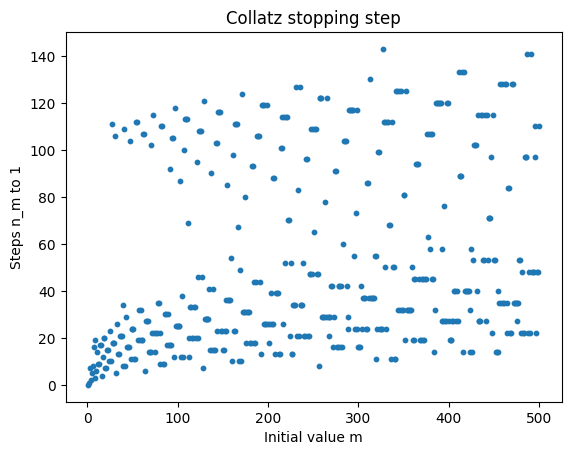

In [6]:
def collatz(n):
    return n//2 if n % 2 == 0 else 3*n+1

def stopping_time(m):
    steps = 0
    x = m
    while x > 1:
        x = collatz(x)
        steps += 1
    return steps

N = range(1, 501)
steps = [stopping_time(m) for m in N]

plt.scatter(N, steps, s=10)
plt.xlabel("Initial value m")
plt.ylabel("Steps n_m to 1")
plt.title("Collatz stopping step")
plt.show()